<a href="https://colab.research.google.com/github/Vnainhda/Deep-Learning-Models/blob/main/Kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


dataset_dir = '/content/drive/MyDrive/my dataset final 512x512(implemented)'


IMG_HEIGHT = 120
IMG_WIDTH = 120
BATCH_SIZE = 28


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)


train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=5 )


val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.1f}%")


y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).astype(int).flatten()


y_true = validation_generator.classes


class_report = classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys())
print("Classification Report:\n", class_report)


conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Found 3902 images belonging to 2 classes.
Found 1671 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 33s 197ms/step - accuracy: 0.9285 - loss: 0.1717 - val_accuracy: 0.9939 - val_loss: 0.0306
Epoch 2/5
  1/139 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 0.0028

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 5.7908e-09
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 25s 176ms/step - accuracy: 0.9973 - loss: 0.0069 - val_accuracy: 0.9952 - val_loss: 0.0108
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 4.9036e-04 - val_accuracy: 1.0000 - val_loss: 5.4374e-09
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 26s 178ms/step - accuracy: 0.9988 - loss: 0.0041 - val_accuracy: 0.9927 - val_loss: 0.0288
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9771 - loss: 0.0878
Validation Accuracy: 99.3%
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step
Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.93      0.96       176
       stone       0.99      1.00      1.00      1495

    accuracy                           0.99      1671
   macro avg       1.00      0.97      0.98      1671
weighted avg       0.99      0.99      0.99 

60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step


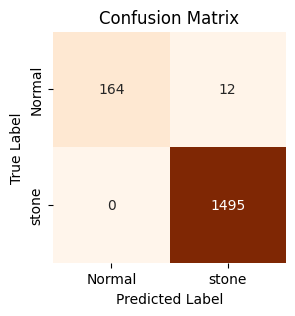

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).astype(int).flatten()


y_true = validation_generator.classes


conf_matrix = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
